# Praca domowa 7 - Katarzyna Solawa

In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import mixture
import sklearn
from sklearn.mixture import GaussianMixture


## Dane

In [184]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
val = pd.read_csv('val.csv')

train - bez próbek odstających, do trenowania modelu

test - do oceny skuteczności modelu, dodana informacja o klasie 0=inliers, 1=outliers

val - analogiczny do test, ale bez klasy

In [185]:
train.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,12.72,1.75,2.28,22.5,84,1.38,1.76,0.48,1.63,3.30,0.88,2.42,488
1,13.23,3.30,2.28,18.5,98,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675
2,12.58,1.29,2.10,20.0,103,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640
3,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510
4,13.84,4.12,2.38,19.5,89,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480


In [200]:
val.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410
1,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
2,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685
3,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660
4,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845


In [186]:
test.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750
1,0,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278
2,0,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520
3,0,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
4,0,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625


## Model

In [187]:
gmm = mixture.GaussianMixture(n_components=2, random_state=8)
gmm.fit(train)

GaussianMixture(n_components=2, random_state=8)

## Outliery
### wyznaczmy treshold na bazie zbioru val
Score sample zwraca ważone prawdopodobieństwa logarytmiczne dla każdej próbki. 

(array([1., 0., 1., 0., 1., 0., 3., 2., 6., 3.]),
 array([-61.99208695, -57.06532946, -52.13857196, -47.21181447,
        -42.28505698, -37.35829949, -32.43154199, -27.5047845 ,
        -22.57802701, -17.65126951, -12.72451202]),
 <BarContainer object of 10 artists>)

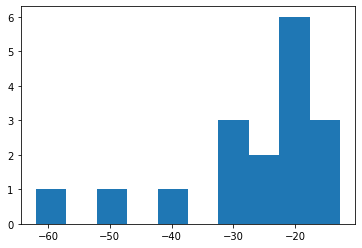

In [192]:
X = gmm.score_samples(val)
plt.hist(X)

Wybierzmy treshold = -33

In [201]:
treshold = -33

### ocena modelu z użyciem zbioru test

In [202]:
predicted = (gmm.score_samples(test.drop(['class'], axis=1)) <= treshold).astype(int)

In [203]:
from sklearn.metrics import f1_score, precision_score, recall_score
print(f"f1_score: {f1_score(test['class'], predicted)}")
print(f"precision_score: {precision_score(test['class'], predicted)}")
print(f"recall_score: {recall_score(test['class'], predicted)}")

f1_score: 1.0
precision_score: 1.0
recall_score: 1.0


Modelowi udało się wykryć próbki odstające.